In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
# Load your dataset
df = pd.read_csv('datasets/training_data.csv')

# Mapping dictionary
label_mapping = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

# Replace numerical labels with words
df['label'] = df['label'].map(label_mapping)

df.head(7)

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business
4,"Oil prices soar to all-time record, posing new...",Business
5,"Stocks End Up, But Near Year Lows (Reuters) Re...",Business
6,Money Funds Fell in Latest Week (AP) AP - Asse...,Business


## Class Distribution

The dataset is perfectly balanced, as each label has the same amount of samples, exacly 30000 news per type.

Class Distribution:
 label
Business    30000
Sci/Tech    30000
Sports      30000
World       30000
Name: count, dtype: int64


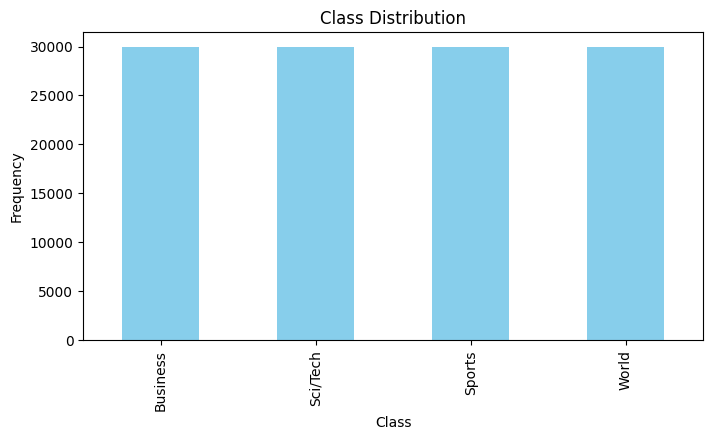

In [4]:
# Class Distribution
class_distribution = df['label'].value_counts()
print("Class Distribution:\n", class_distribution)

# Exploratory Data Visualization
plt.figure(figsize=(8, 4))
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

## Top Words by Label
Identify the top TF-IDF weighted words for each label. This can give us insights into the most distinctive words for each category.


Weights for label Business
--------------------------
1 - reuter: 0.44899490220892785
2 - compani: 0.2823151381217315
3 - fullquot: 0.18676786915332938
4 - stock: 0.18245457273468577
5 - oil: 0.1627596850794942
6 - price: 0.14641063730116916
7 - investor: 0.12216172527449916
8 - profit: 0.11523977013842632
9 - busi: 0.11069060971056394
10 - gt: 0.10155829846835357



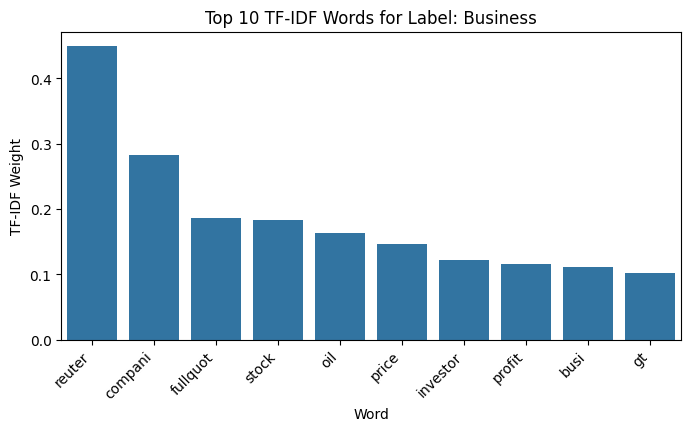


Weights for label Sci/Tech
--------------------------
1 - compani: 0.2559134572234
2 - softwar: 0.2266908653843512
3 - reuter: 0.21695000143800158
4 - servic: 0.21577863172293424
5 - comput: 0.20067412750232883
6 - microsoft: 0.17290050603893278
7 - technolog: 0.15924463021152546
8 - secur: 0.15634703144267464
9 - announc: 0.1364132988015693
10 - onlin: 0.1268778354530853



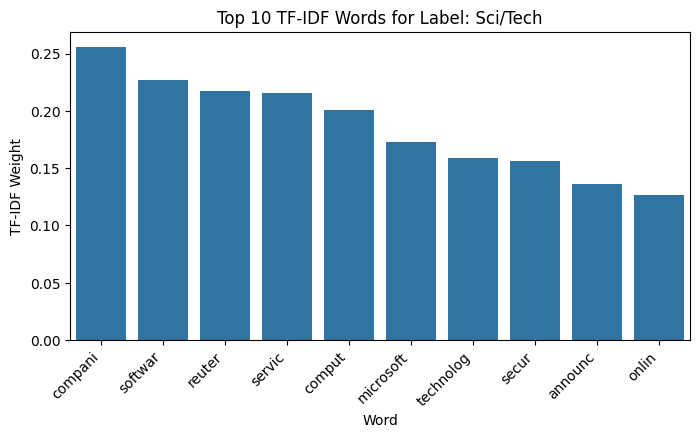


Weights for label Sports
--------------------------
1 - victori: 0.2049294040026918
2 - leagu: 0.20246822430078734
3 - game: 0.19921867689880973
4 - win: 0.1890300934359115
5 - olymp: 0.173440781345973
6 - team: 0.15025916715128146
7 - ap: 0.14782720278783348
8 - coach: 0.14691410710555325
9 - season: 0.14205169556690908
10 - cup: 0.1400609099202887



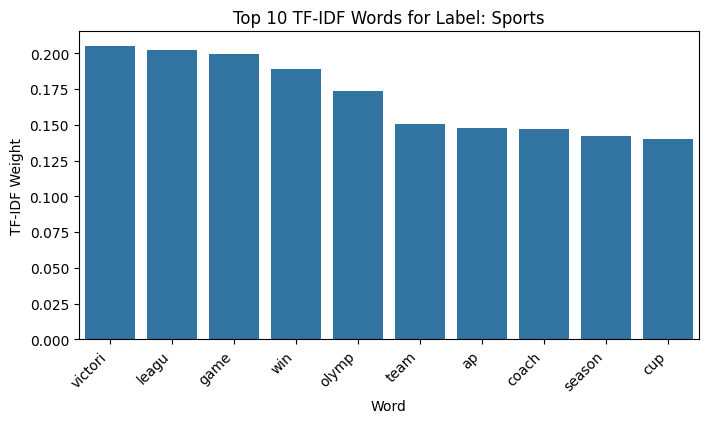


Weights for label World
--------------------------
1 - reuter: 0.2957879430122501
2 - presid: 0.2437537004096894
3 - kill: 0.22573936601382677
4 - minist: 0.19690106477488895
5 - iraq: 0.1776720162643407
6 - offici: 0.17224752425459816
7 - peopl: 0.15741176535743198
8 - elect: 0.14509543023565952
9 - govern: 0.1301973272382205
10 - palestinian: 0.12693218538333326



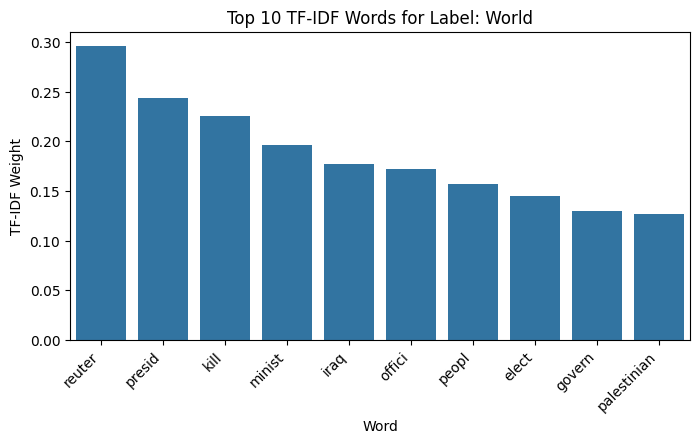

In [5]:
ps = PorterStemmer()
sw = set(stopwords.words('english'))

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")

labels = df['label'].unique()

# Create a dictionary to store the top 10 words for each label
top_words_by_label = {label: [] for label in labels}

for label in labels:

    label_df = df[df['label'] == label]
    other_df = df[df['label'] != label]

    corpus = []
    for row in label_df['text']:
        # get review and remove non alpha chars
        new = re.sub('[^a-zA-Z]', ' ', row)
        new = new.lower()
        # split into tokens, apply stemming and remove stop words
        new = ' '.join([ps.stem(w) for w in new.split() if w not in sw])
        corpus.append(new)#new)

    # Join the sentences into a single text
    text = ' '.join(corpus)

    new_row = {'text': text, 'label': label}
    new_df = pd.concat([other_df, pd.DataFrame([new_row])], ignore_index=True)


    X = vectorizer.fit_transform(new_df['text'])
    feature_names_list = vectorizer.get_feature_names_out()

    feature_weights = zip(feature_names_list, X[90000].toarray()[0])
    # Exclude the words from feature_weights
    #feature_weights = [(feature, count) for feature, count in feature_weights if feature != 'ap']
    top_10_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)[:10]
    
    print(f'\nWeights for label {label}')
    print('--------------------------')

    idx = 1
    for feature, count in top_10_features:
        print(f"{idx} - {feature}: {count}") 
        idx += 1
    print()

    # Visualize the top 10 TF-IDF words using a bar plot
    plt.figure(figsize=(8, 4))
    sns.barplot(x=[feature for feature, _ in top_10_features], y=[count for _, count in top_10_features])
    plt.title(f'Top 10 TF-IDF Words for Label: {label}')
    plt.xlabel('Word')
    plt.ylabel('TF-IDF Weight')
    plt.xticks(rotation=45, ha='right')
    plt.show()

### Let's clean the text..

In [6]:
corpus = []
ps = PorterStemmer()
sw = set(stopwords.words('english'))
for i in range(0, df['text'].size):
    # get review and remove non alpha chars
    new = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    # to lower-case
    new = new.lower()
    # split into tokens, apply stemming and remove stop words
    new = ' '.join([ps.stem(w) for w in new.split() if w not in sw])
    corpus.append(new)
  
df['text'] = corpus
df.head()

,text,label
0,wall st bear claw back black reuter reuter sho...,Business
1,carlyl look toward commerci aerospac reuter re...,Business
2,oil economi cloud stock outlook reuter reuter ...,Business
3,iraq halt oil export main southern pipelin reu...,Business
4,oil price soar time record pose new menac us e...,Business


## Text Length Distribution

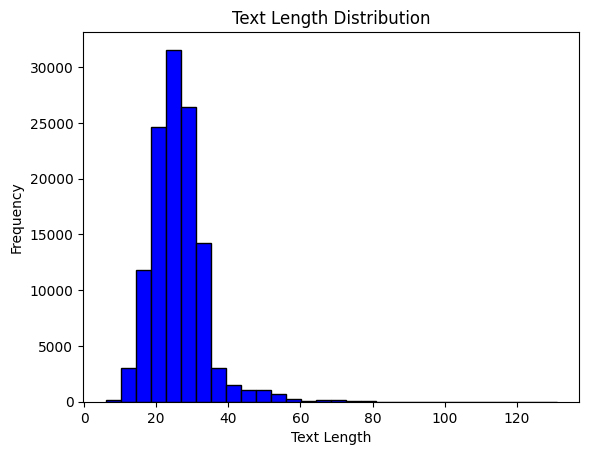

In [7]:
# Text Length Distribution
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
plt.hist(df['text_length'], bins=30, color='blue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Through this analysis we can conclude that most of the news have text length between 20 and 30. Maybe it will be good if we **discard rows whose news have text-length smaller than 10 or higher than 40**.

## Word Clouds
Word clouds can assist in summarizing the main content of a document or set of documents. The most prominent words in the cloud provide a snapshot of the key information.

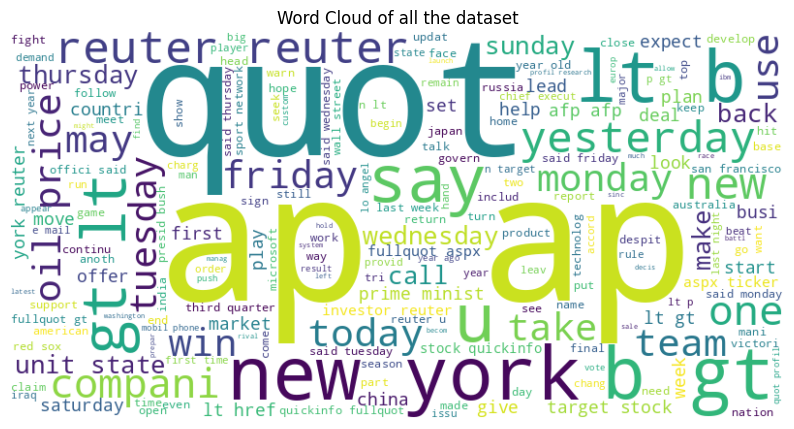

In [8]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of all the dataset')
plt.show()

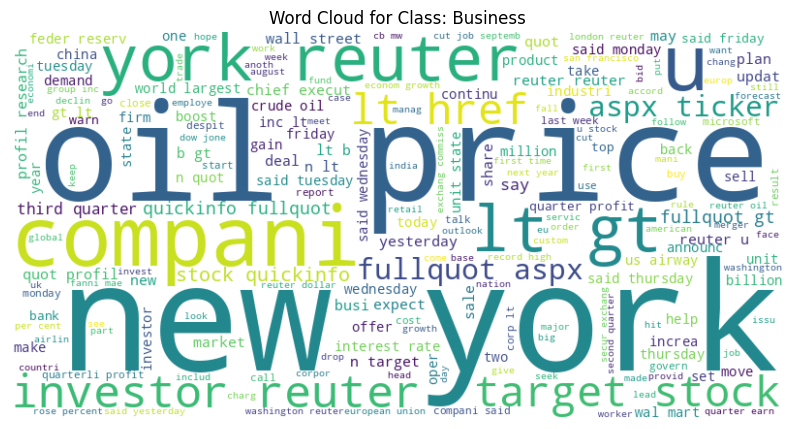

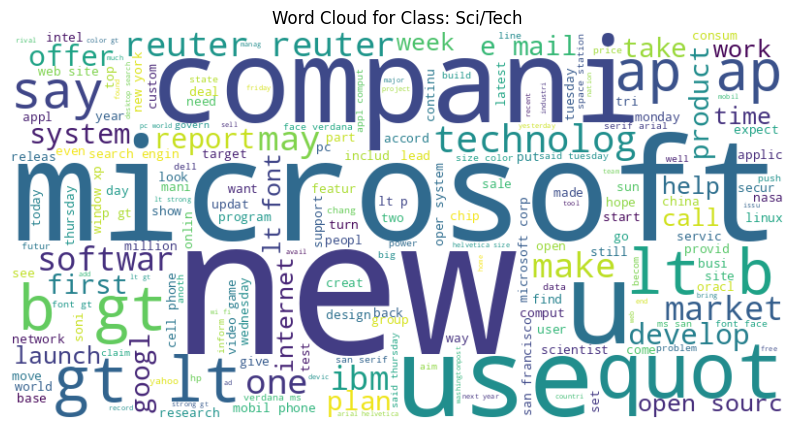

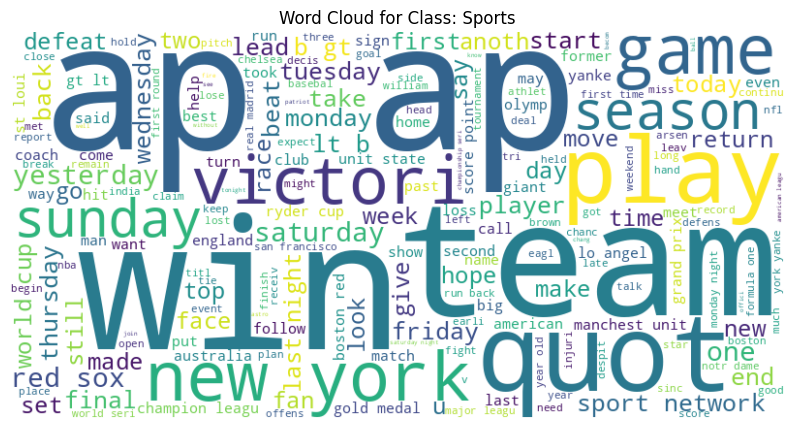

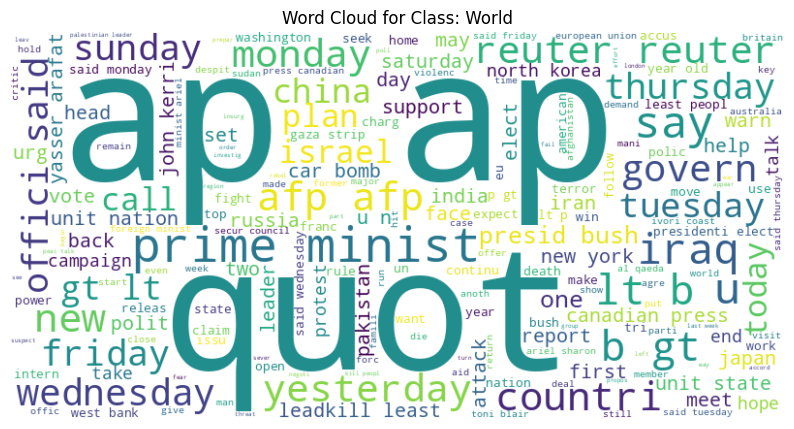

In [9]:
# Correlation Analysis (Example: Word Frequency per Class)
for label in df['label'].unique():
    label_df = df[df['label'] == label]
    label_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(label_df['text']))
    plt.figure(figsize=(10, 6))
    plt.imshow(label_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Class: {label}')
    plt.show()

Word clouds provide an intuitive way to visualize the frequency of words in a given text or dataset. The word *"AP AP"* seems to be of little use, appearing many times in all kinds of news, so it **should be removed.**

## Sentiment Analysis
It helps to understand the sentiment trends in each news category, providing insights into the overall tone of the news content.

Sentiment Analysis Results:


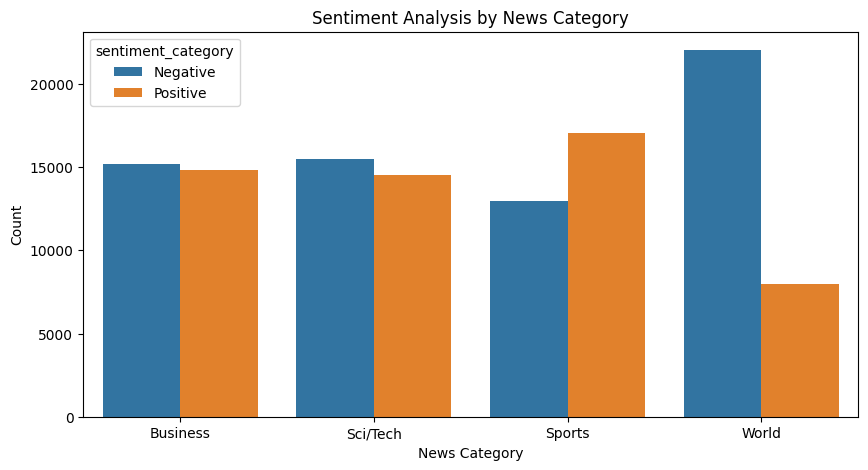

In [10]:
analyzer = SentimentIntensityAnalyzer()

# Categorize sentiment into positive, negative, and neutral
df['sentiment_category'] = df['text'].apply(lambda x: 'Positive' if analyzer.polarity_scores(x)['compound'] > 0 else 'Negative')

# Show sentiment analysis results
print("Sentiment Analysis Results:")
#print(df[['text', 'label', 'sentiment_category']])
# Explore the relationship between labels and sentiment categories
plt.figure(figsize=(10, 5))
sns.countplot(x='label', hue='sentiment_category', data=df)
plt.title('Sentiment Analysis by News Category')
plt.xlabel('News Category')
plt.ylabel('Count')
plt.show()

*World* news category seems to **have more negative content** than the others.